<a href="https://colab.research.google.com/github/Prithika-97/Flight-Delay-Prediction/blob/main/Flight%20Delay%20Prediction%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


FLIGHT DELAY PREDICTION

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Attention, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

Load Dataset and Preprocess Data

In [ ]:
# Load the dataset
file_path = 'flight.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             14952 non-null  object 
 1   Departure Airport                                14952 non-null  object 
 2   Departure Airport Rating (out of 10)             4909 non-null   float64
 3   Departure Airport On Time Rating (out of 10)     4909 non-null   float64
 4   Departure Airport Service Rating (out of 10)     4909 non-null   float64
 5   Arrival Airport                                  14952 non-null  object 
 6   Arrival Airport Rating (out of 10)               14952 non-null  float64
 7   Arrival Airport On Time Rating (out of 10)       14952 non-null  float64
 8   Arrival Airport Service Rating (out of 10)       14952 non-null  float64
 9   Airplane Type               

In [ ]:
# Load the dataset
file_path = 'flight.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Handling missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical data
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Box-Cox Transformation for positive, non-zero values
for col in numerical_cols:
    if (df[col] > 0).all():
        df[col], _ = boxcox(df[col] + 1)


In [ ]:
df.head()

,Date,Departure Airport,Departure Airport Rating (out of 10),Departure Airport On Time Rating (out of 10),Departure Airport Service Rating (out of 10),Arrival Airport,Arrival Airport Rating (out of 10),Arrival Airport On Time Rating (out of 10),Arrival Airport Service Rating (out of 10),Airplane Type,...,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,1.339437,-1.066670,4.622089e-15,0.000000,0.000000,-0.019114,0.244277,0.213768,0.833925,0.048443,...,-1.029672e+00,7.627165e-01,-1.213172e+00,-0.102645,-0.322396,0.964883,-1.349935e+00,-0.006242,-1.322326e+00,2.238203e-01
1,1.339437,1.433802,1.297281e+00,1.297102,1.299541,1.542568,1.097746,1.157454,-1.199149,0.048443,...,-1.673360e+00,-1.928089e+00,-1.391528e+00,-0.486529,-0.322396,1.182307,-2.551325e+00,-0.006242,1.391262e+00,-1.974865e+00
2,1.339437,0.600312,4.622089e-15,0.000000,0.000000,-0.019114,0.244277,0.213768,0.833925,0.048443,...,3.811394e-16,-5.310923e-16,-1.584120e-16,0.000000,0.000000,0.000000,7.113657e-16,0.000000,-3.996104e-16,-3.550590e-16
3,1.339437,-1.066670,4.622089e-15,0.000000,0.000000,-0.019114,0.244277,0.213768,0.833925,0.048443,...,-1.029672e+00,7.627165e-01,-1.213172e+00,-0.102645,-0.322396,0.964883,-1.349935e+00,-0.006242,-1.322326e+00,2.238203e-01
4,1.339437,0.600312,4.622089e-15,0.000000,0.000000,-0.019114,0.244277,0.213768,0.833925,1.292989,...,3.811394e-16,-5.310923e-16,-1.584120e-16,0.000000,0.000000,0.000000,7.113657e-16,0.000000,-3.996104e-16,-3.550590e-16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             14952 non-null  float64
 1   Departure Airport                                14952 non-null  float64
 2   Departure Airport Rating (out of 10)             14952 non-null  float64
 3   Departure Airport On Time Rating (out of 10)     14952 non-null  float64
 4   Departure Airport Service Rating (out of 10)     14952 non-null  float64
 5   Arrival Airport                                  14952 non-null  float64
 6   Arrival Airport Rating (out of 10)               14952 non-null  float64
 7   Arrival Airport On Time Rating (out of 10)       14952 non-null  float64
 8   Arrival Airport Service Rating (out of 10)       14952 non-null  float64
 9   Airplane Type               

Feature Engineering

In [ ]:
# Feature Engineering
# Convert continuous target 'Arrival Time Delay' into discrete categories
delay_bins = [-np.inf, 0, 15, np.inf]
delay_labels = ['No Delay', 'Minor Delay', 'Major Delay']
y = pd.cut(df['Arrival Time Delay'], bins=delay_bins, labels=delay_labels)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

Exploratory Data Analysis (EDA)

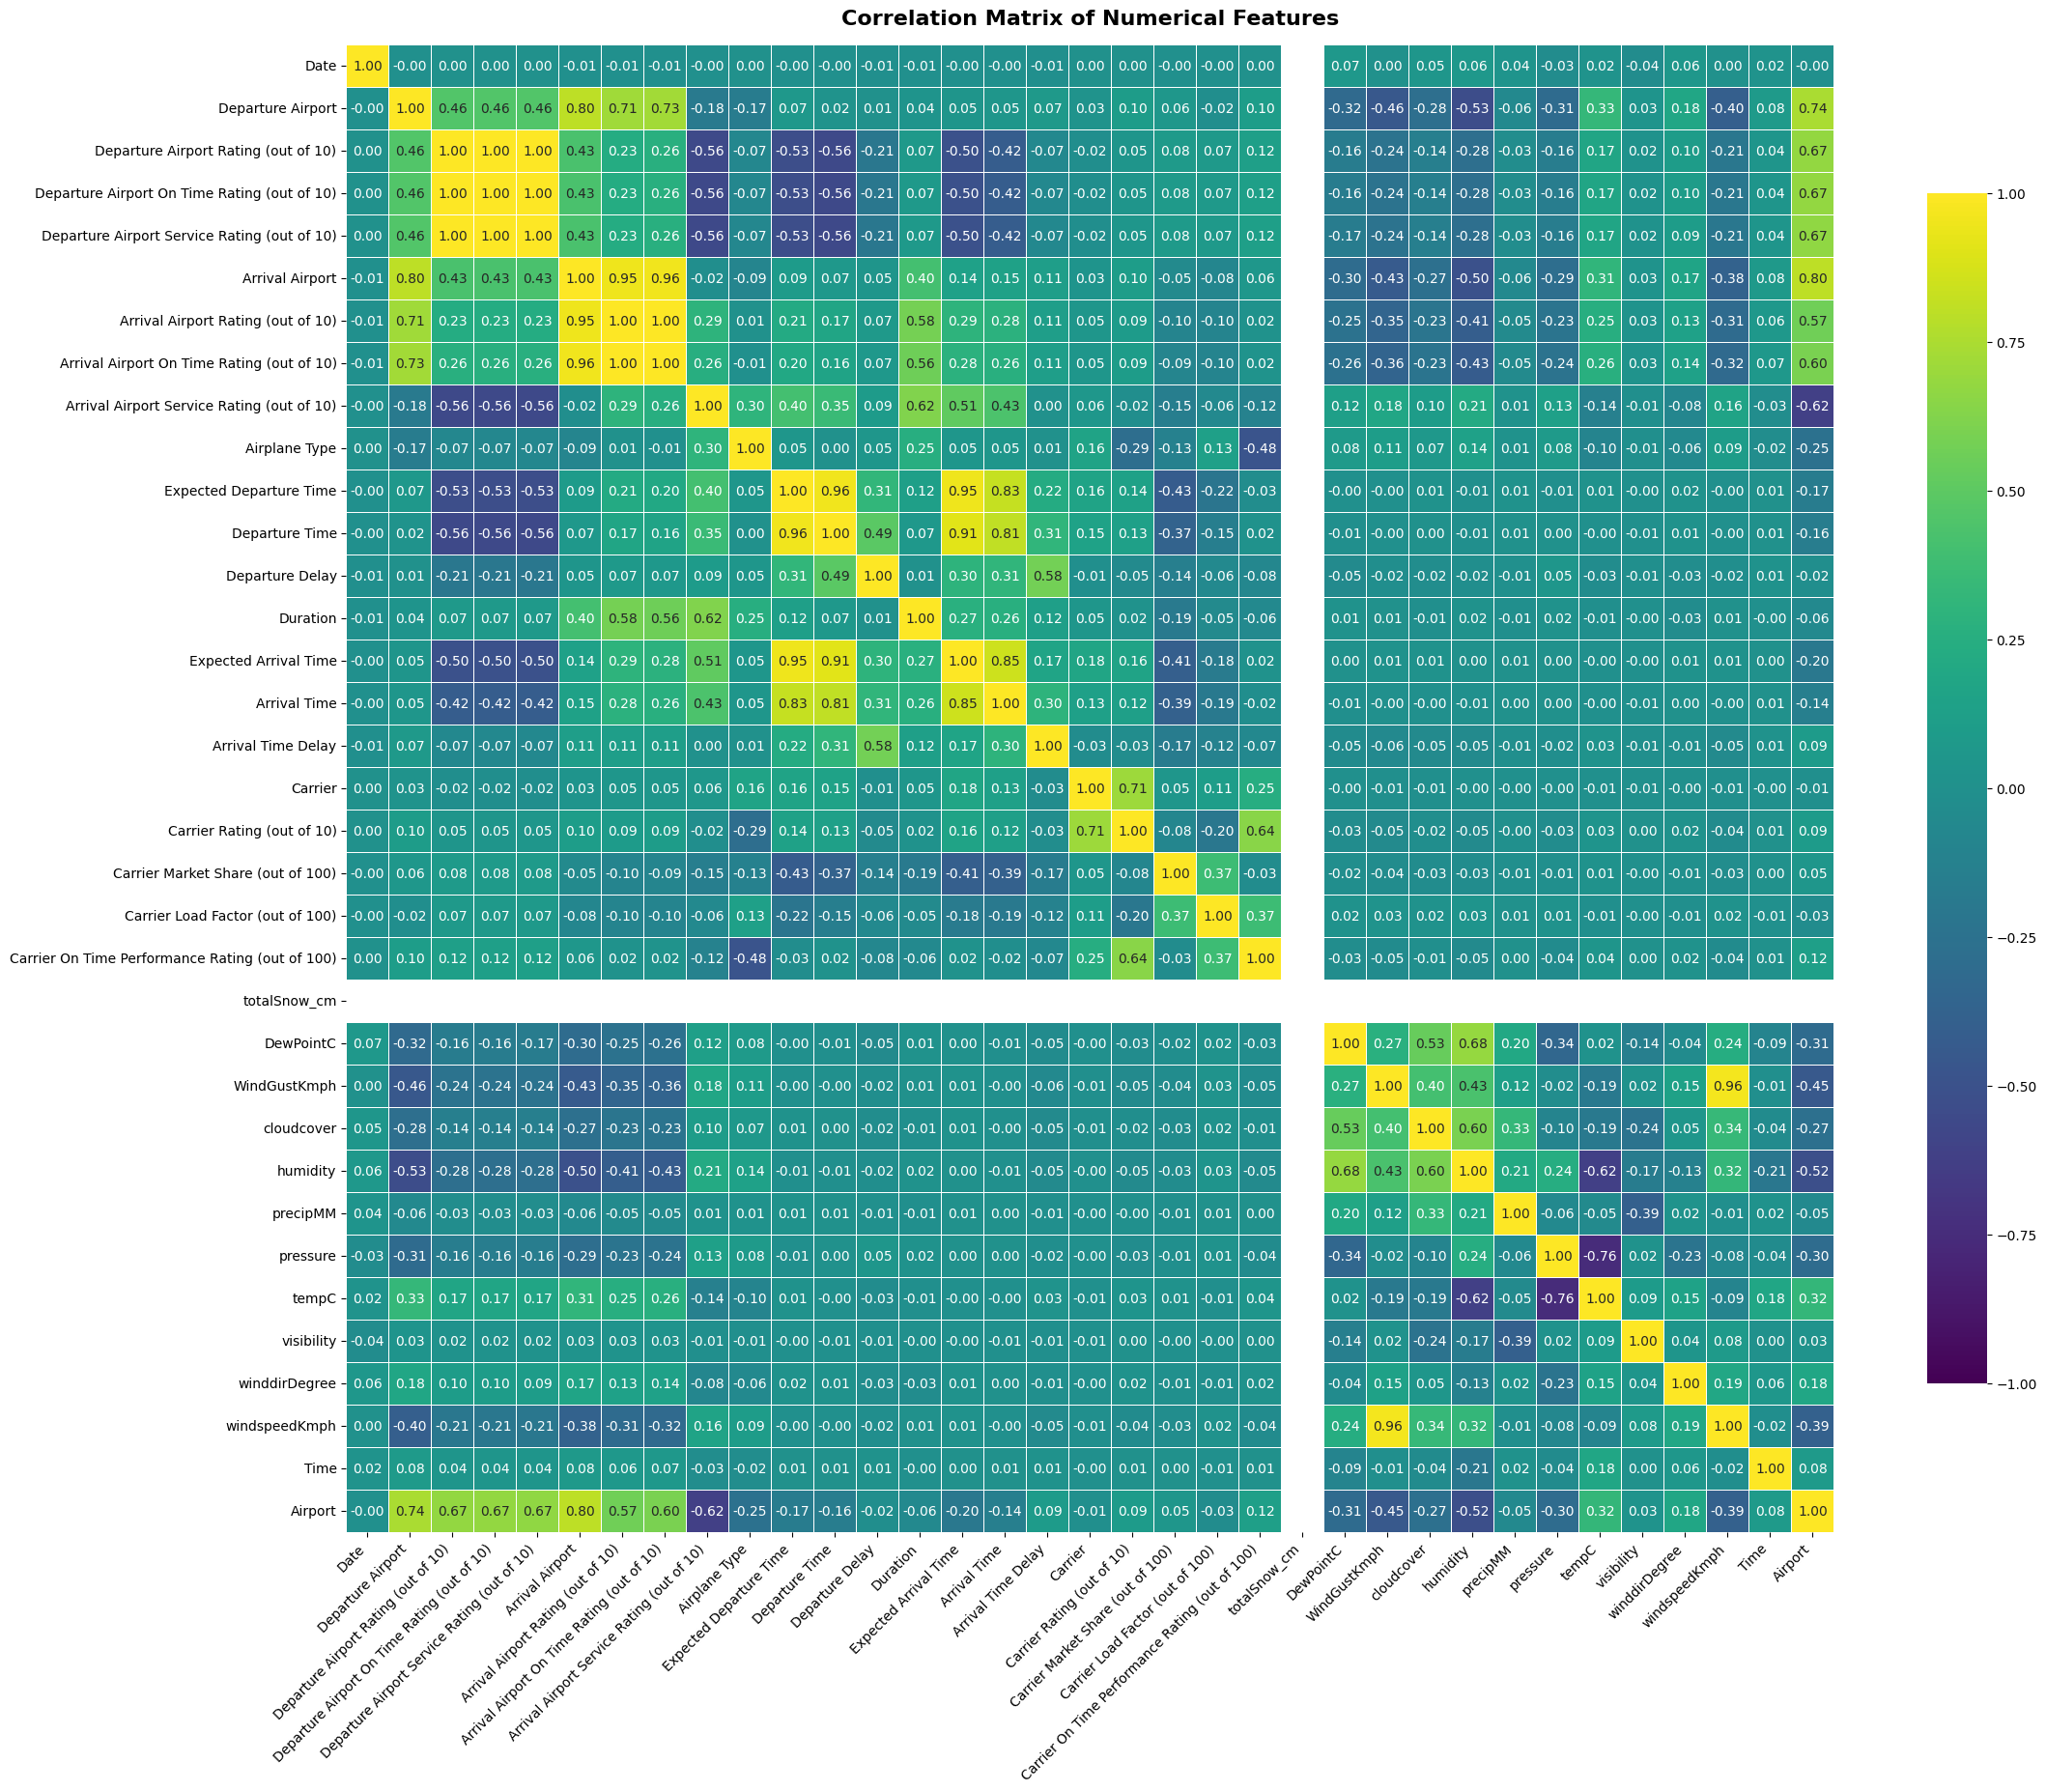

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(25, 20))
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1,
            linewidths=0.5, linecolor="white", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numerical Features", fontsize=16, weight="bold", pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

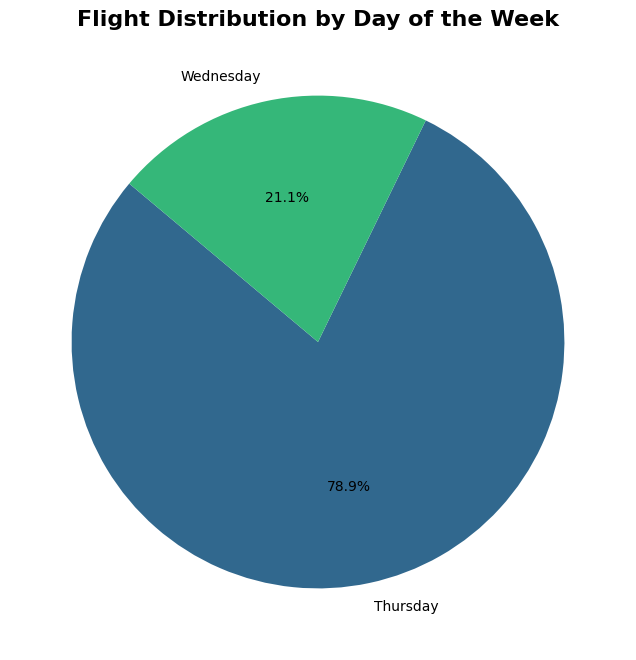

In [ ]:
# 2. Delay Analysis by Day of the Week
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()
flight_counts = df['Weekday'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(flight_counts, labels=flight_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(flight_counts)))
plt.title("Flight Distribution by Day of the Week", fontsize=16, weight="bold")
plt.show()

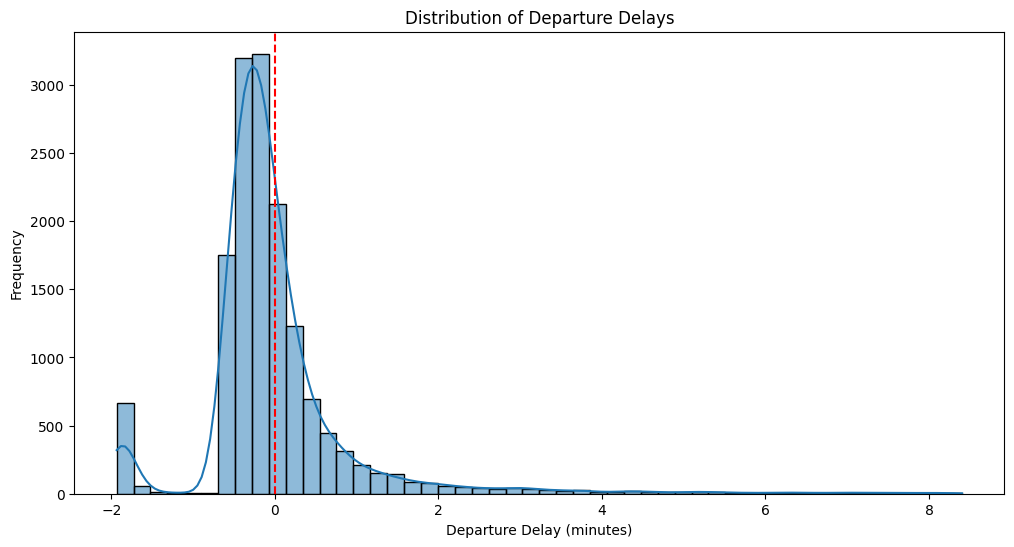

In [ ]:
# 3. Distribution of Delayed vs Non-Delayed Flights
plt.figure(figsize=(12, 6))
sns.histplot(df['Departure Delay'], bins=50, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

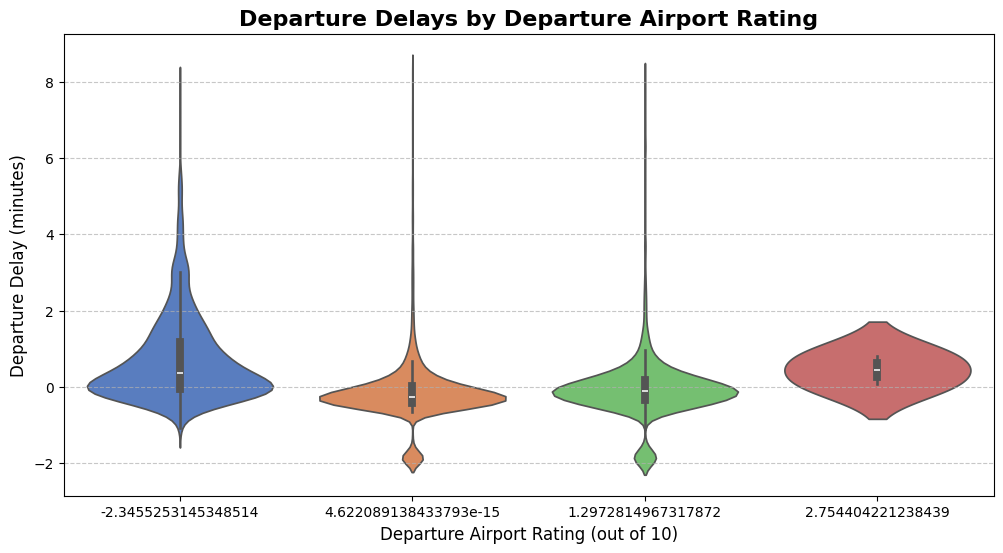

In [ ]:
# 4. Delays by Departure Airport Rating
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Departure Airport Rating (out of 10)', y='Departure Delay', palette='muted')
plt.title("Departure Delays by Departure Airport Rating", fontsize=16, weight="bold")
plt.xlabel("Departure Airport Rating (out of 10)", fontsize=12)
plt.ylabel("Departure Delay (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

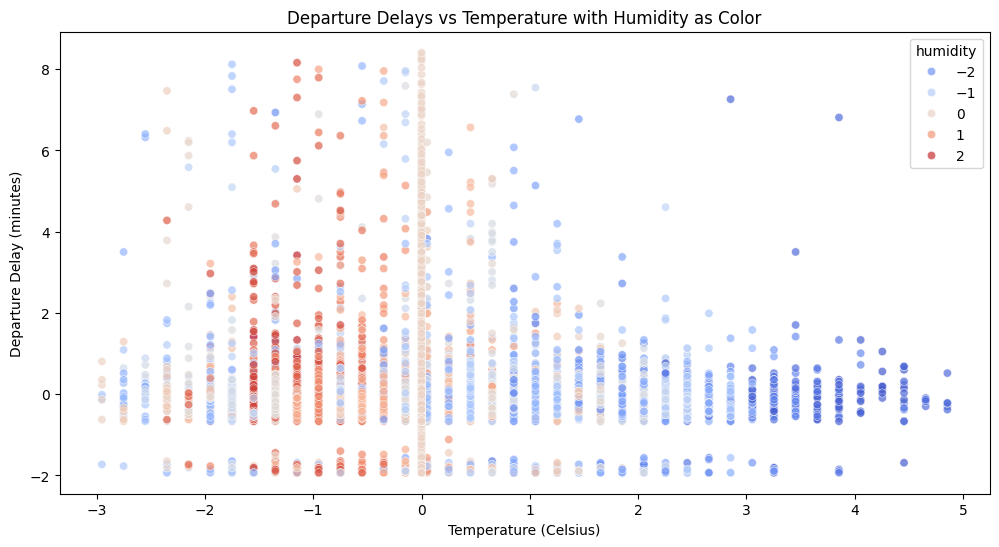

In [ ]:
# 5. Weather Impact: Delays vs Temperature and Humidity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tempC', y='Departure Delay', hue='humidity', palette='coolwarm', alpha=0.7)
plt.title("Departure Delays vs Temperature with Humidity as Color")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

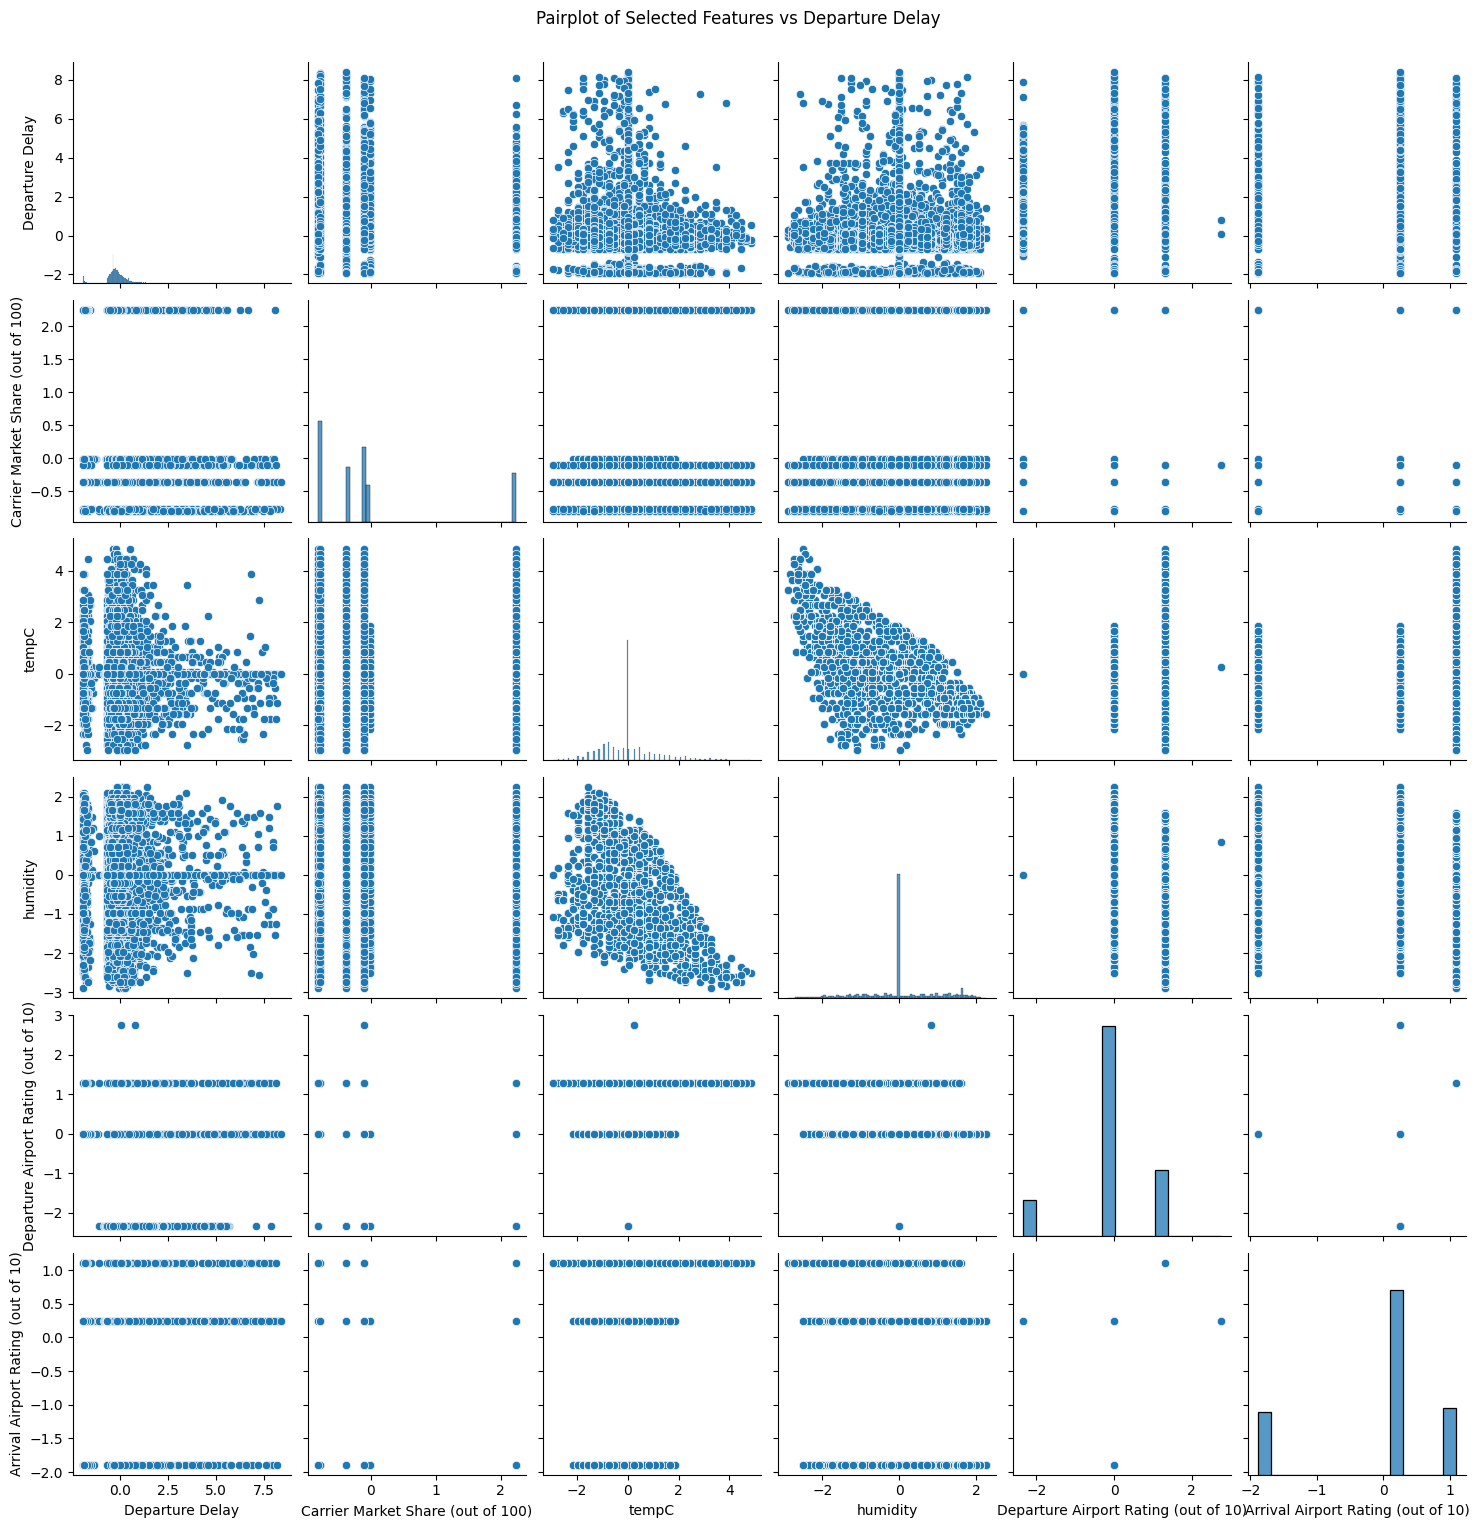

In [ ]:
# 6. Multivariate Analysis using Pairplot
sns.pairplot(df, vars=['Departure Delay', 'Carrier Market Share (out of 100)', 'tempC', 'humidity', 'Departure Airport Rating (out of 10)', 'Arrival Airport Rating (out of 10)'])
plt.suptitle("Pairplot of Selected Features vs Departure Delay", y=1.02)
plt.show()

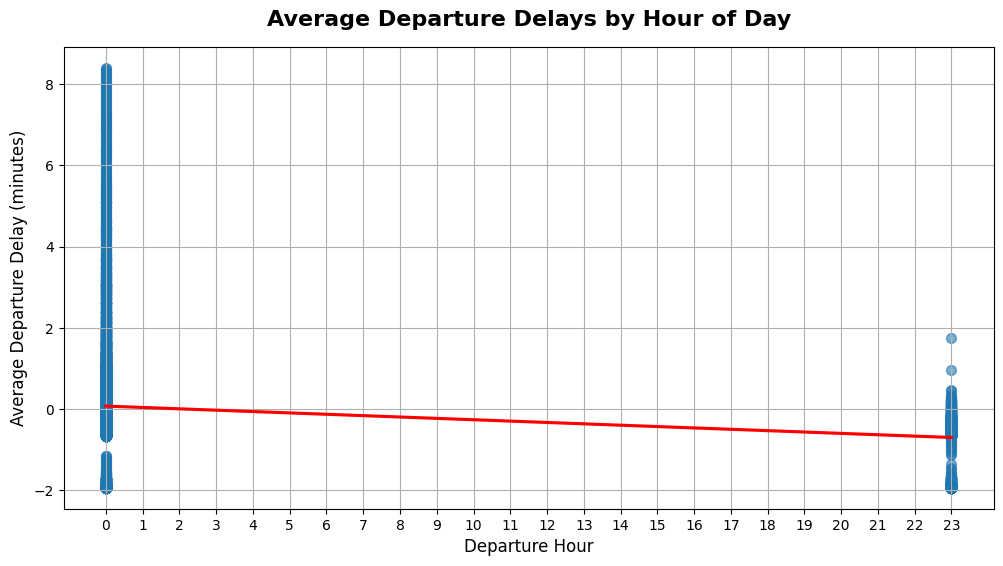

In [ ]:
# 7. Analysis of Delays by Time (Hour of Departure)
departure_hours = pd.to_datetime(df['Departure Time'], errors='coerce').dt.hour

plt.figure(figsize=(12, 6))
sns.regplot(x=departure_hours, y=df['Departure Delay'], scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Average Departure Delays by Hour of Day", fontsize=16, weight="bold", pad=15)
plt.xlabel("Departure Hour", fontsize=12)
plt.ylabel("Average Departure Delay (minutes)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


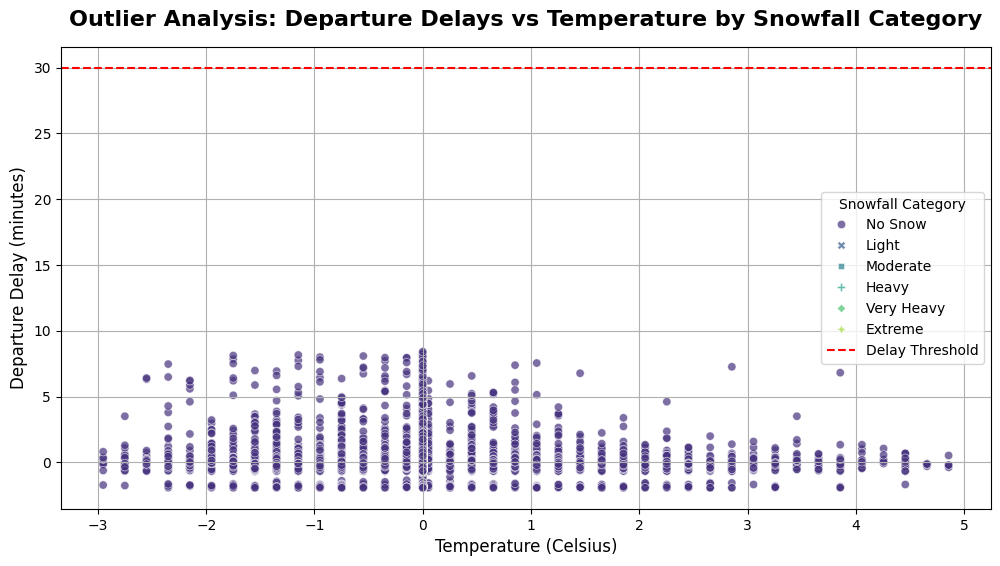

In [ ]:
# 8. Outlier Analysis: Departure Delay Outliers vs Weather Conditions
snowfall_categories = pd.cut(df['totalSnow_cm'], bins=[-1, 0, 1, 5, 10, 20, np.inf],
                             labels=['No Snow', 'Light', 'Moderate', 'Heavy', 'Very Heavy', 'Extreme'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['tempC'], y=df['Departure Delay'], hue=snowfall_categories, alpha=0.7, palette='viridis', style=snowfall_categories)
plt.title("Outlier Analysis: Departure Delays vs Temperature by Snowfall Category", fontsize=16, weight="bold", pad=15)
plt.xlabel("Temperature (Celsius)", fontsize=12)
plt.ylabel("Departure Delay (minutes)", fontsize=12)
plt.axhline(y=30, color='r', linestyle='--', label='Delay Threshold')
plt.legend(title='Snowfall Category')
plt.grid(True)
plt.show()

Split the data

In [ ]:
# Split data into features (X) and target (y)
X = df.drop('Arrival Time Delay', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Development

In [ ]:
#DeepONet Model
def create_deeponet_model(input_shape):
    input_branch = Input(shape=(input_shape,))
    branch_out = Dense(64, activation='relu')(input_branch)
    branch_out = Dense(32, activation='relu')(branch_out)

    input_trunk = Input(shape=(input_shape,))
    trunk_out = Dense(64, activation='relu')(input_trunk)
    trunk_out = Dense(32, activation='relu')(trunk_out)

    combined = Concatenate()([branch_out, trunk_out])
    combined_out = Dense(64, activation='relu')(combined)
    combined_out = Dense(3, activation='softmax')(combined_out)

    model = Model(inputs=[input_branch, input_trunk], outputs=combined_out)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Attention-based Model
class ExpandDimsLayer(Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

def create_attention_model(input_shape):
    inputs = Input(shape=(input_shape,))

    # Use custom layer to expand dimensions
    reshaped_inputs = ExpandDimsLayer()(inputs)

    attention_data = Dense(64, activation='relu')(reshaped_inputs)
    attention_scores = Attention()([attention_data, attention_data])

    # Flatten the output to return to a 2D tensor
    attention_out = Flatten()(attention_scores)
    attention_out = Dense(32, activation='relu')(attention_out)

    output = Dense(3, activation='softmax')(attention_out)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# PMIL Model (Fixed without using expand_dims)
def create_pmil_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate Models
deeponet_model = create_deeponet_model(X_train.shape[1])
attention_model = create_attention_model(X_train.shape[1])
pmil_model = create_pmil_model(X_train.shape[1])

# Define deep models dictionary for looping
deep_models = {
    'DeepONet': deeponet_model,
    'Attention': attention_model,
    'PMIL': pmil_model
}

In [ ]:
# Train Models and Record Results
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'AdaBoost': AdaBoostClassifier()
}

results = {}

# Training and evaluation for traditional models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }
    print(f"{model_name} Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("="*60)

#Training DeepONet, Attention, and PMIL Models
deep_models = {
    'DeepONet': deeponet_model,
    'Attention': attention_model,
    'PMIL': pmil_model
}

for model_name, model in deep_models.items():
    print(f"Training {model_name} Model...")
    if model_name == 'DeepONet':
        model.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

        # Predictions
        y_pred = np.argmax(model.predict([X_test, X_test]), axis=1)

    elif model_name == 'Attention':
        # No reshaping for Attention model
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

        # Predictions
        y_pred = np.argmax(model.predict(X_test), axis=1)

    else:
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

        # Predictions
        y_pred = np.argmax(model.predict(X_test), axis=1)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    # Display results
    print(f"{model_name} Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("="*60)

Decision Tree Model Evaluation:
Accuracy: 0.9501838849882982
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       996
           1       0.97      0.96      0.96      1995

    accuracy                           0.95      2991
   macro avg       0.94      0.95      0.94      2991
weighted avg       0.95      0.95      0.95      2991

Confusion Matrix:
 [[ 931   65]
 [  84 1911]]
Random Forest Model Evaluation:
Accuracy: 0.9775994650618522
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       996
           1       0.98      0.99      0.98      1995

    accuracy                           0.98      2991
   macro avg       0.98      0.97      0.97      2991
weighted avg       0.98      0.98      0.98      2991

Confusion Matrix:
 [[ 957   39]
 [  28 1967]]
XGBoost Model Evaluation:
Accuracy: 0.9893012370444667
Classification Report:
      

In [ ]:
import plotly.express as px
model_accuracies = {model_name: results[model_name]['Accuracy'] for model_name in results.keys()}
model_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
fig = px.bar(model_df, x='Model', y='Accuracy', color='Accuracy', color_continuous_scale='Viridis',text='Accuracy',  title="Model Accuracy Comparison",labels={'Accuracy': 'Model Accuracy (%)'})
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Show values on top of bars
fig.update_layout(xaxis_title="Model",yaxis_title="Accuracy",title_x=0.5,plot_bgcolor='rgba(0,0,0,0)',xaxis=dict(tickangle=-45), yaxis=dict(gridcolor='lightgrey'))
fig.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import xgboost as xgb

# Create styled input widgets
departure_airport = widgets.Text(description='Departure Airport:', placeholder='Enter IATA code (e.g., JFK)', style={'description_width': 'initial'})
arrival_airport = widgets.Text(description='Arrival Airport:', placeholder='Enter IATA code (e.g., LAX)', style={'description_width': 'initial'})
carrier = widgets.Text(description='Carrier:', placeholder='Enter airline name or code', style={'description_width': 'initial'})
expected_departure_time = widgets.Text(description='Expected Departure Time (HH:MM):', placeholder='Enter in HH:MM format', style={'description_width': 'initial'})
duration = widgets.IntText(description='Duration (minutes):', placeholder='Enter flight duration', style={'description_width': 'initial'})
expected_arrival_time = widgets.Text(description='Expected Arrival Time (HH:MM):', placeholder='Enter in HH:MM format', style={'description_width': 'initial'})
date = widgets.DatePicker(description='Date:', style={'description_width': 'initial'})
temperature = widgets.FloatText(description='Temperature (Celsius):', placeholder='Enter temperature at departure', style={'description_width': 'initial'})

# Create a button for triggering the prediction
predict_button = widgets.Button(description='Predict Flight Delay', button_style='info', tooltip='Click to predict if the flight will be delayed')

# Output area to display the prediction
output_area = widgets.Output()

# Display the widgets
display(widgets.VBox([departure_airport, arrival_airport, carrier, expected_departure_time,
                      duration, expected_arrival_time, date, temperature, predict_button]), output_area)

# Function to prepare input data as a DataFrame for the model
def prepare_input(departure_airport, arrival_airport, carrier, expected_departure_time,
                  duration, expected_arrival_time, date, temperature):
    if date is None:
        raise ValueError("Please select a valid date.")

    # Get the feature names from your trained model
    feature_names = models['XGBoost'].get_booster().feature_names

    # Create a DataFrame with all the required columns and fill with default values
    input_features = pd.DataFrame([[None] * len(feature_names)], columns=feature_names)

    # Fill in the values from user input
    input_features['Departure Airport'] = [departure_airport]
    input_features['Arrival Airport'] = [arrival_airport]
    input_features['Carrier'] = [carrier]
    input_features['Expected Departure Time'] = [expected_departure_time]
    input_features['Duration'] = [duration]
    input_features['Expected Arrival Time'] = [expected_arrival_time]
    input_features['Date'] = [date.strftime('%Y-%m-%d')]
    input_features['tempC'] = [temperature]

    # Provide default values for missing features - ADJUST THESE BASED ON YOUR DATA!!!
    input_features['Departure Airport Service Rating (out of 10)'] = [5]
    input_features['windspeedKmph'] = [10]

    # Convert object columns to appropriate types:
    object_columns = ['Departure Airport Rating (out of 10)', 'Departure Airport On Time Rating (out of 10)',
                      'Arrival Airport Rating (out of 10)', 'Arrival Airport On Time Rating (out of 10)',
                      'Arrival Airport Service Rating (out of 10)', 'Airplane Type', 'Departure Time',
                      'Departure Delay', 'Arrival Time', 'Carrier Rating (out of 10)',
                      'Carrier Market Share (out of 100)', 'Carrier Load Factor (out of 100)',
                      'Carrier On Time Performance Rating (out of 100)', 'totalSnow_cm', 'DewPointC',
                      'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'visibility',
                      'winddirDegree']

    # Loop to Convert columns to appropriate type
    for col in object_columns:
        try:
            input_features[col] = pd.to_numeric(input_features[col], errors='coerce')
        except ValueError:
            input_features[col] = input_features[col].astype('category')
            input_features[col] = input_features[col].cat.codes

    # Apply cat.codes to categorical columns after default values are assigned
    categorical_columns = ['Departure Airport', 'Arrival Airport', 'Carrier', 'Expected Departure Time', 'Expected Arrival Time', 'Date']
    for col in categorical_columns:
        input_features[col] = input_features[col].astype('category')
        input_features[col] = input_features[col].cat.codes

    return input_features

# Function to predict flight delay using the model defined in the notebook
def predict_delay(departure_airport, arrival_airport, carrier, expected_departure_time,
                  duration, expected_arrival_time, date, temperature):
    input_data = prepare_input(departure_airport, arrival_airport, carrier,
                               expected_departure_time, duration, expected_arrival_time, date, temperature)

    # Access the trained XGBoost model from the 'models' dictionary
    XGBoost_model = models['XGBoost']

    # Predict using your model directly with the input_data DataFrame
    prediction = XGBoost_model.predict(input_data)[0]

    with output_area:
        clear_output()
        if prediction > 0:
            print(f"The flight is predicted to be delayed by approximately {int(prediction)} minutes.")
        else:
            print("The flight will be on time.")

# Event handler for the button click
def on_button_clicked(b):
    try:
        predict_delay(departure_airport.value, arrival_airport.value, carrier.value,
                      expected_departure_time.value, duration.value, expected_arrival_time.value,
                      date.value, temperature.value)
    except ValueError as e:
        with output_area:
            clear_output()
            print(f"Error: {e}")

# Attach the event handler to the button
predict_button.on_click(on_button_clicked)


Output()